In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file = Path('./Resources/crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head(25)

CoinName       Algorithm  IsTrading ProofType  TotalCoinsMined  \
42              42 Coin          Scrypt       True   PoW/PoS     4.199995e+01   
365             365Coin             X11       True   PoW/PoS              NaN   
404             404Coin          Scrypt       True   PoW/PoS     1.055185e+09   
611           SixEleven         SHA-256       True       PoW              NaN   
808                 808         SHA-256       True   PoW/PoS     0.000000e+00   
1337          EliteCoin             X13       True   PoW/PoS     2.927942e+10   
2015          2015 coin             X11       True   PoW/PoS              NaN   
BTC             Bitcoin         SHA-256       True       PoW     1.792718e+07   
ETH            Ethereum          Ethash       True       PoW     1.076842e+08   
LTC            Litecoin          Scrypt       True       PoW     6.303924e+07   
DASH               Dash             X11       True   PoW/PoS     9.031294e+06   
XMR              Monero  CryptoNight-V7       True       PoW     1.720114e+07   
ETC    Ethereum Classic          Ethash       True       PoW     1.133597e+08   
ZEC               ZCash        Equihash       True       PoW     7.383056e+06   
BTS           Bitshares         SHA-512       True       PoS     2.741570e+09   
DGB            DigiByte        Multiple       True       PoW     1.140622e+10   
BTCD        BitcoinDark         SHA-256       True   PoW/PoS     1.288862e+06   
CRAIG        CraigsCoin             X11       True       PoS              NaN   
XBS            Bitstake             X11       True   PoW/PoS     0.000000e+00   
XPY             PayCoin         SHA-256       True       PoS     1.199533e+07   
PRC         ProsperCoin          Scrypt       True       PoW     5.768310e+06   
YBC              YbCoin        Multiple       True       PoS              NaN   
DANK           DarkKush             X13       True   PoW/PoS              NaN   
GIVE           GiveCoin             X11       True       PoW              NaN   
KOBO           KoboCoin             X15       True   PoW/PoS     2.554254e+07   

      TotalCoinSupply  
42                 42  
365        2300000000  
404         532000000  
611            611000  
808                 0  
1337     314159265359  
2015                0  
BTC          21000000  
ETH                 0  
LTC          84000000  
DASH         22000000  
XMR                 0  
ETC         210000000  
ZEC          21000000  
BTS        3600570502  
DGB       21000000000  
BTCD         22000000  
CRAIG        30000000  
XBS           1300000  
XPY          12500000  
PRC          21000000  
YBC         200000000  
DANK          3000000  
GIVE        500000000  
KOBO        350000000

In [4]:
# List of algorithms
algos = set(df.Algorithm.values)
print(algos)

{'Proof-of-Authority', 'X16R', 'Cryptonight-GPU', 'CryptoNight Heavy', 'Leased POS', 'HybridScryptHash256', 'Counterparty', 'BLAKE256', 'Quark', 'Blake2b', 'XG Hash', 'PoS', 'X11GOST', 'Stanford Folding', 'NeoScrypt', 'Scrypt', 'NIST5', 'Green Protocol', 'Semux BFT consensus', 'SHA-256 + Hive', 'QUAIT', 'X13', 'Ouroboros', 'IMesh', 'ScryptOG', 'VeChainThor Authority', 'Tribus', 'Groestl', 'Wild Keccak', 'Argon2d', 'M7 POW', 'Multiple', 'HMQ1725', 'SkunkHash', 'SHA3', 'X11', 'VBFT', 'SHA-256D', 'Time Travel', 'SHA-256', '1GB AES Pattern Search', 'Lyra2REv2', 'Argon2', 'XEVAN', 'Curve25519', 'vDPOS', 'Keccak', 'Scrypt-n', 'Momentum', 'Proof-of-BibleHash', 'Equihash+Scrypt', 'T-Inside', 'Rainforest', '536', 'ECC 256K1', 'SHA3-256', 'YescryptR16', 'Ethash', 'PHI1612', 'Progressive-n', 'Zhash', 'Avesta hash', 'CryptoNight', 'DPoS', 'Cloverhash', 'M00N', 'Lyra2Z', 'C11', 'TRC10', 'Blake', 'Equihash', 'CryptoNight-V7', 'Lyra2RE', 'CryptoNight-Lite', 'Blake2S', 'Jump Consistent Hash', 'SkunkHa

In [5]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Only cryptocurrencies being traded
df = df.loc[df['IsTrading'] == True]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
# Delete IsTrading column
df = df.drop('IsTrading', axis=1)
df.head()

CoinName Algorithm ProofType  TotalCoinsMined TotalCoinSupply
42     42 Coin    Scrypt   PoW/PoS     4.199995e+01              42
365    365Coin       X11   PoW/PoS              NaN      2300000000
404    404Coin    Scrypt   PoW/PoS     1.055185e+09       532000000
611  SixEleven   SHA-256       PoW              NaN          611000
808        808   SHA-256   PoW/PoS     0.000000e+00               0

In [8]:
# Dropping all null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [9]:
# TotalCoinsMined to identify negative or zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
# Select only rows with positive TotalCoinsMined
df = df[df['TotalCoinsMined'] > 0]
len(df)

532

In [11]:
# Delete CoinName column
df = df.drop('CoinName', axis=1)
df.head()

Algorithm ProofType  TotalCoinsMined TotalCoinSupply
42      Scrypt   PoW/PoS     4.199995e+01              42
404     Scrypt   PoW/PoS     1.055185e+09       532000000
1337       X13   PoW/PoS     2.927942e+10    314159265359
BTC    SHA-256       PoW     1.792718e+07        21000000
ETH     Ethash       PoW     1.076842e+08               0

In [12]:
# Create mock-up variables for columns with string values
X = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


TotalCoinsMined TotalCoinSupply  Algorithm_1GB AES Pattern Search  \
42       4.199995e+01              42                                 0   
404      1.055185e+09       532000000                                 0   
1337     2.927942e+10    314159265359                                 0   
BTC      1.792718e+07        21000000                                 0   
ETH      1.076842e+08               0                                 0   

      Algorithm_536  Algorithm_Argon2d  Algorithm_BLAKE256  Algorithm_Blake  \
42                0                  0                   0                0   
404               0                  0                   0                0   
1337              0                  0                   0                0   
BTC               0                  0                   0                0   
ETH               0                  0                   0                0   

      Algorithm_Blake2S  Algorithm_Blake2b  Algorithm_C11  ...  \
42                    0                  0              0  ...   
404                   0                  0              0  ...   
1337                  0                  0              0  ...   
BTC                   0                  0              0  ...   
ETH                   0                  0              0  ...   

      ProofType_PoW/PoS  ProofType_PoW/PoS   ProofType_PoW/PoW  \
42                    1                   0                  0   
404                   1                   0                  0   
1337                  1                   0                  0   
BTC                   0                   0                  0   
ETH                   0                   0                  0   

      ProofType_PoW/nPoS  ProofType_Pos  ProofType_Proof of Authority  \
42                     0              0                             0   
404                    0              0                             0   
1337                   0              0                             0   
BTC                    0              0                             0   
ETH                    0              0                             0   

      ProofType_Proof of Trust  ProofType_TPoS  \
42                           0               0   
404                          0               0   
1337                         0               0   
BTC                          0               0   
ETH                          0               0   

      ProofType_Zero-Knowledge Proof  ProofType_dPoW/PoW  
42                                 0                   0  
404                                0                   0  
1337                               0                   0  
BTC                                0                   0  
ETH                                0                   0  

[5 rows x 98 columns]

In [13]:
# Data Standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [15]:
# Pinpoint the numbers of rows and columns
X_scaled.shape

(532, 98)

# Reduce dataset dimensions with PCA

In [16]:
# Reduced dimensions using PCA
pca = PCA(n_components=.90)
principal_components = pca.fit_transform(X_scaled)
principal_components.shape

(532, 74)

In [17]:
# The aggregate explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566151

In [18]:
# Reduce dimensions with t-SNE
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

(532, 2)

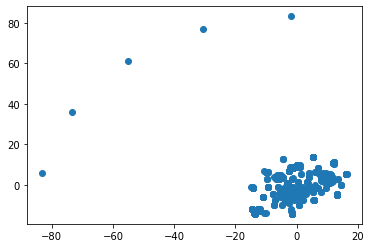

In [20]:
# Plot t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [21]:
# Identify clusters with k-means
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\E5450\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


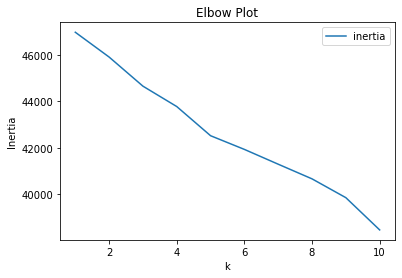

In [23]:
# Create an elbow plot
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

# Conclusion
# Both the t-SNE and the elbow plot using k-means suggest they are not meaningful clusters found in the dataset.